In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# global params
mpl.rcParams['patch.linewidth'] = 2
mpl.rcParams['axes.linewidth'] = 2

In [13]:
# figure wrappers and canvas drawing functions
def draw_canvas(height=10, width=10):
    """Wrapper function to return a figure"""
    fig = plt.figure(figsize=(width, height), 
                        facecolor='white', edgecolor='black')
    ax = fig.add_subplot(1, 1, 1)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    return fig, ax

def select_subregion(section, nrows=5, ncols=5):
    """Splits each canvas into square rastered portions and returns limits of one of them."""
    row_chunk_size = 1/nrows # think this is continuous
    col_chunk_size = 1/ncols
    row =  section // ncols
    col = section % ncols
    rowSpan = (row_chunk_size * row, row_chunk_size*(row+1))
    colSpan = (col_chunk_size * col, col_chunk_size*(col+1))
    return rowSpan, colSpan

def draw_rectangle(ax, rowSpan, colSpan, fill=True, color='k', padding=0.02):
    """Takes a figure axis and position, and draws a rectangle there. Converts to matrix-style positioning"""
    r = plt.Rectangle((colSpan[0] + padding, (1-rowSpan[1]+padding)),
                      colSpan[1] - colSpan[0] - 2*padding,
                      rowSpan[1] - rowSpan[0] - 2*padding,
                      fill=fill, fc=color) # first arguments are bottom left hand corner, then width, THEN height
    return r
    
def draw_circle(ax, rowSpan, colSpan, fill=True, color='k', padding=0.02):
    """Takes a figure axis and position, and draws a circle there. Converts to matrix positioning"""
    c = plt.Circle((np.mean(colSpan), 1-np.mean(rowSpan)), 
                   radius=((rowSpan[1]-rowSpan[0])/2) - padding,
                  fill=fill, fc=color)
    return c

def draw_triangle(ax, rowSpan, colSpan, fill=True, color='k', padding=0.02):
    """Takes a figure axis and position, and draws a triangle there. Converts to matrix positioning"""
    top = 1-rowSpan[1] + padding
    bottom = 1-rowSpan[0] - padding
    point_0 = (colSpan[0]+padding, top)
    point_1 = (np.mean(colSpan), bottom)
    point_2 = (colSpan[1]-padding, top)
    
    if fill:
        t = plt.Polygon((point_0, point_1, point_2),
                fc=color, lw=lw)
    else:
        t = plt.Polygon((point_0, point_1, point_2),
                  fill=fill, fc=color)
    return t

def draw_inverted_triangle(ax, rowSpan, colSpan, fill=True, color='k', padding=0.02):
    """Takes a figure axis and position, and draws a triangle there. Converts to matrix positioning"""
    top = 1-rowSpan[0] - padding
    bottom = 1-rowSpan[1] + padding
    point_0 = (colSpan[0]+padding, top)
    point_1 = (np.mean(colSpan), bottom)
    point_2 = (colSpan[1]-padding, top)
    
    if fill:
        it = plt.Polygon((point_0, point_1, point_2),
                fc=color)
    else:
        it = plt.Polygon((point_0, point_1, point_2),
                  fill=fill, fc=color)
    return it


def draw_cross(ax, rowSpan, colSpan, fill=True, color='k', padding=0.02):
    """Takes a figure axis and position, and draws a triangle there. Converts to matrix positioning"""
    third_height = (rowSpan[1] - rowSpan[0] - 2*padding) / 3
    third_length = (colSpan[1] - colSpan[0] - 2*padding) / 3
    point_0 = (colSpan[0] + padding, 1-rowSpan[1] + padding + 2* third_height)
    point_1 = (colSpan[0] + padding + third_length, 1-rowSpan[1] + padding + 2* third_height)
    point_2 = (colSpan[0] + padding + third_length, 1-rowSpan[0] - padding)
    point_3 = (colSpan[0] + padding + 2*third_length, 1-rowSpan[0] - padding)
    point_4 = (colSpan[0] + padding + 2*third_length, 1-rowSpan[1] + padding + 2* third_height)
    point_5 = (colSpan[0] + padding + 3*third_length, 1-rowSpan[1] + padding + 2* third_height)
    point_6 = (colSpan[0] + padding + 3*third_length, 1-rowSpan[1] + padding + third_height)
    point_7 = (colSpan[0] + padding + 2*third_length, 1-rowSpan[1] + padding + third_height)
    point_8 = (colSpan[0] + padding + 2*third_length, 1-rowSpan[1] + padding)
    point_9 = (colSpan[0] + padding + third_length, 1-rowSpan[1] + padding)
    point_10 = (colSpan[0] + padding + third_length, 1-rowSpan[1] + padding + third_height)
    point_11 = (colSpan[0] + padding, 1-rowSpan[1] + padding + third_height)
    
    cr = plt.Polygon((point_0, point_1, point_2, point_3, point_4, point_5, point_6, 
                      point_7, point_8, point_9, point_10, point_11),
                  fill=fill, fc=color)
    return cr
    
def draw_ship(ax, rowSpan, colSpan, fill=True, color='k', padding=0.02):
    """Takes a figure axis and position, and draws a ship there. Converts to matrix positioning"""
    fourth_height = (rowSpan[1] - rowSpan[0] - 2*padding) / 4
    fifth_length = (colSpan[1] - colSpan[0] - 2*padding) / 5
    
    point_0 = (colSpan[0] + padding, 1 - rowSpan[1] + padding + 2*fourth_height)
    point_1 = (colSpan[0] + fifth_length + padding, 1 - rowSpan[1] + padding + 2*fourth_height)
    point_2 = (colSpan[0] + 2*fifth_length + padding, 1 - rowSpan[0] - padding)
    point_3 = (colSpan[0] + 2*fifth_length + padding, 1 - rowSpan[1] + padding + 2*fourth_height)
    point_4 = (colSpan[0] + 3*fifth_length + padding, 1 - rowSpan[1] + padding + 2*fourth_height)
    point_5 = (colSpan[0] + 3*fifth_length + padding, 1 - rowSpan[0] - padding)
    point_6 = (colSpan[0] + 4*fifth_length + padding, 1 - rowSpan[1] + padding + 2*fourth_height)
    point_7 = (colSpan[0] + 5*fifth_length + padding, 1 - rowSpan[1] + padding + 2*fourth_height)
    point_8 = (colSpan[0] + 3.5*fifth_length + padding, 1 - rowSpan[1] + padding)
    point_9 = (colSpan[0] + 1.5*fifth_length + padding, 1 - rowSpan[1] + padding)
    sh = plt.Polygon((point_0, point_1, point_2, point_3, point_4, point_5, point_6,
                     point_7, point_8, point_9),
                  fill=fill, fc=color)
    return sh
    

def output_stimulus(stimulus_list, save=False, save_path='.'):
    fig, ax = draw_canvas()
    patches = []

    for fn, pos, fill in stimulus_list: # args must be ordered
        print(fill)
        rS, cS = select_subregion(pos)
        patches.append(fn(ax, rS, cS, fill=fill))

    collection = mpl.collections.PatchCollection(patches, match_original=True)
    ax.add_artist(collection)
    if save:
        plt.savefig('{}.svg'.format(save_path), bbox_inches='tight')
    return fig, ax

False
False
False
False
False


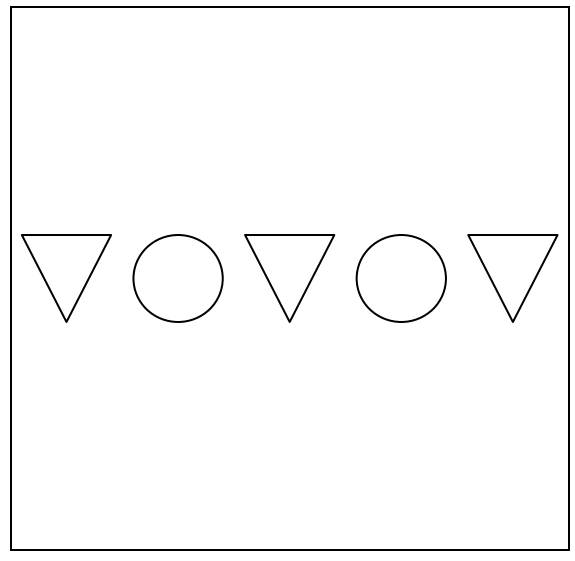

False
False
False
False
False


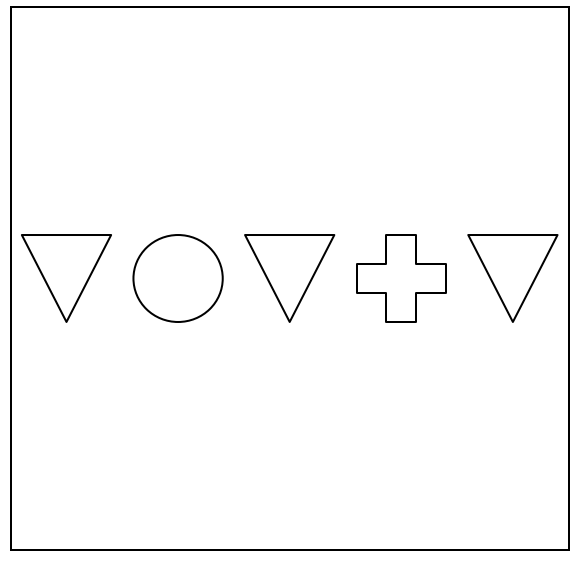

True
True
True
True
True


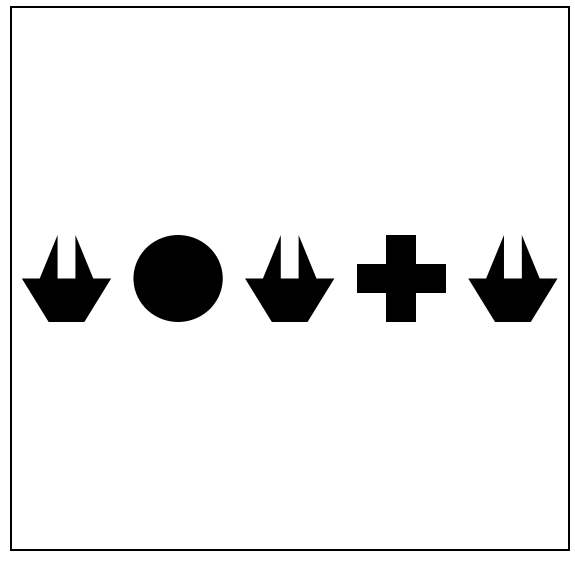

False
False
False
False
False


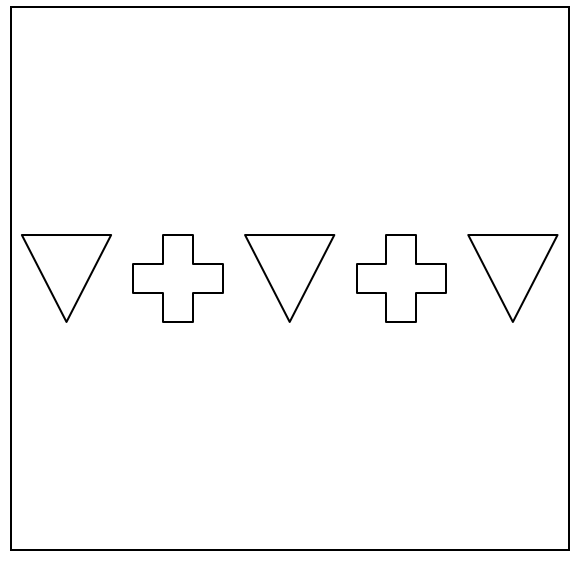

True
True
True
True
True


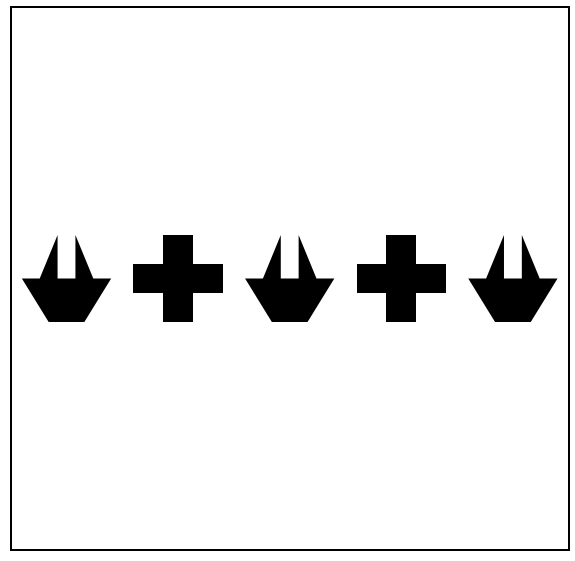

In [14]:
# draw stimulus T
output_stimulus([[draw_inverted_triangle, 10, False], [draw_circle, 11, False], 
              [draw_inverted_triangle, 12, False],
             [draw_circle, 13, False], [draw_inverted_triangle, 14, False]], save=True, save_path='img/T')
plt.show()

# draw stimulus A
output_stimulus([[draw_inverted_triangle, 10, False], [draw_circle, 11, False], 
              [draw_inverted_triangle, 12, False],
             [draw_cross, 13, False], [draw_inverted_triangle, 14, False]], save=True, save_path='img/A')
plt.show()

# draw stimulus B
output_stimulus([[draw_ship, 10, True], [draw_circle, 11, True], 
              [draw_ship, 12, True],
             [draw_cross, 13, True], [draw_ship, 14, True]], save=True, save_path='img/B')
plt.show()

# draw stimulus C
output_stimulus([[draw_inverted_triangle, 10, False], [draw_cross, 11, False], 
              [draw_inverted_triangle, 12, False],
             [draw_cross, 13, False], [draw_inverted_triangle, 14, False]], save=True, save_path='img/C')
plt.show()

# draw stimulus D
output_stimulus([[draw_ship, 10, True], [draw_cross, 11, True], 
              [draw_ship, 12, True],
             [draw_cross, 13, True], [draw_ship, 14, True]], save=True, save_path='img/D')
plt.show()
plt.close('all')